## Predicting All Stars Based of a Full Year of Baseball
Team Members: Chris Spartz, Kevin Gnaster, Zach Josten <br />
Team Number: 31

In [21]:
import numpy as np
import numpy.matlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import scipy.stats as st
import matplotlib.colors as colors
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
import math

In [22]:
star = pd.read_excel("FinalDatasetMLBallStar 11.25.21.xlsx")
star.drop(columns=['xwOBA'], inplace=True)
star=star.rename(columns={'All Star Starter?':'ASstarter'})
star.head(5)

,Season,YearName,Name,Team,G,PA,HR,R,RBI,SB,...,OBP,SLG,wOBA,wRC+,BsR,Off,Def,WAR,playerid,ASstarter
0,2019,2019Mike Trout,Mike Trout,LAA,134,600,45,110,104,11,...,0.438,0.645,0.436,177.0,7.1,65.9,-0.3,8.4,10155,1
1,2019,2019Alex Bregman,Alex Bregman,HOU,156,690,41,122,112,5,...,0.423,0.592,0.418,167.0,-2.1,57.3,4.8,8.4,17678,1
2,2019,2019Christian Yelich,Christian Yelich,MIL,130,580,44,100,97,30,...,0.429,0.671,0.442,174.0,8.5,65.2,-3.9,7.8,11477,1
3,2019,2019Cody Bellinger,Cody Bellinger,LAD,156,660,47,121,115,15,...,0.406,0.629,0.415,161.0,1.4,54.2,3.4,7.7,15998,1
4,2019,2019Marcus Semien,Marcus Semien,OAK,162,747,33,123,92,10,...,0.369,0.522,0.373,138.0,1.7,37.7,14.1,7.6,12533,0


In [23]:
star2 = star.dropna(how='any',axis=0).copy()

In [24]:
star2.shape

(20161, 25)

In [25]:
star2.drop(columns=['playerid'], inplace=True)
starCorr=star2.corr()
starCorr.iloc[:,-1:].sort_values(by='ASstarter', ascending=False)

,ASstarter
ASstarter,1.000000
WAR,0.413208
Off,0.402159
HR,0.352875
RBI,0.328526
R,0.319117
PA,0.264179
G,0.226927
SB,0.166729
ISO,0.153212


In [26]:
star3 = star2.loc[star2['PA'] >= 450].reset_index()
star3.shape

(3803, 25)

In [27]:
traditional=["HR","R","RBI","SB","BB%","K%","AVG","OBP","SLG"]
advanced=["ISO","BABIP","wOBA","wRC+","BsR","Off","Def","WAR"]
allStats=["HR","R","RBI","SB","BB%","K%","AVG","OBP","SLG","ISO","BABIP","wOBA","wRC+","BsR","Off","Def","WAR"]
y=star3.ASstarter
#Training testing split is 75-25

In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression
X=star3[allStats]
bestfeatures = SelectKBest(score_func=f_regression,k=4)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Features','Score']
print(featureScores.nlargest(6,'Score'))

   Features       Score
14      Off  693.108095
16      WAR  674.581646
12     wRC+  614.409295
11     wOBA  573.485948
8       SLG  540.708224
7       OBP  458.366828


In [29]:
x=star3[["Off","WAR","wRC+","wOBA","SLG","OBP"]]
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, test_size=0.25, random_state = 6)

In [30]:
logitTrain = sm.Logit(ytrain1, sm.add_constant(xtrain1), method = 'kwargs').fit()
print(logitTrain.summary())

Optimization terminated successfully.
         Current function value: 0.229663
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              ASstarter   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2845
Method:                           MLE   Df Model:                            6
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.2630
Time:                        11:07:40   Log-Likelihood:                -655.00
converged:                       True   LL-Null:                       -888.76
Covariance Type:            nonrobust   LLR p-value:                 8.309e-98
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.2792      1.968     -3.191      0.001     -10.136      -2.422
Off           -0.0055      0.

I am going to remove Off since its p-value is very large

In [31]:
x=star3[["WAR","wRC+","wOBA","SLG","OBP"]]
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(x, y, test_size=0.25, random_state = 6)

In [32]:
logitTrain2 = sm.Logit(ytrain1, sm.add_constant(xtrain1), method = 'kwargs').fit()
print(logitTrain2.summary())

Optimization terminated successfully.
         Current function value: 0.229682
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              ASstarter   No. Observations:                 2852
Model:                          Logit   Df Residuals:                     2846
Method:                           MLE   Df Model:                            5
Date:                Thu, 09 Dec 2021   Pseudo R-squ.:                  0.2630
Time:                        11:07:40   Log-Likelihood:                -655.05
converged:                       True   LL-Null:                       -888.76
Covariance Type:            nonrobust   LLR p-value:                 8.611e-99
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8076      1.349     -4.304      0.000      -8.453      -3.163
WAR            0.4186      0.

In [39]:
ypredTestAll = round(logitTrain2.predict(sm.add_constant(xtest1)))
print("Accuracy test Logistic regression of all stats:",metrics.accuracy_score(ytest1, ypredTestAll))
ypredTrainAll = round(logitTrain2.predict(sm.add_constant(xtrain1)))
print("Accuracy train Logistic regression of all stats:",metrics.accuracy_score(ytrain1, ypredTrainAll))

Accuracy test Logistic regression of all stats: 0.9263932702418507
Accuracy train Logistic regression of all stats: 0.9137447405329593


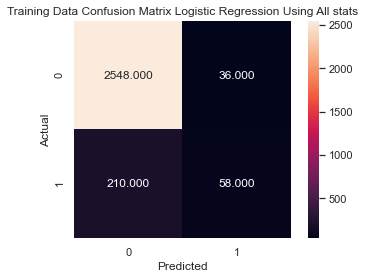

In [40]:
conf= metrics.confusion_matrix(ytrain1, ypredTrainAll)
sns.heatmap(conf, annot=True, fmt=".3f", square = True);
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.title('Training Data Confusion Matrix Logistic Regression Using All stats');

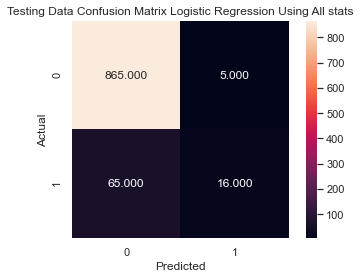

In [41]:
conf= metrics.confusion_matrix(ytest1, ypredTestAll)
sns.heatmap(conf, annot=True, fmt=".3f", square = True);
plt.ylabel('Actual');
plt.xlabel('Predicted');
plt.title('Testing Data Confusion Matrix Logistic Regression Using All stats');

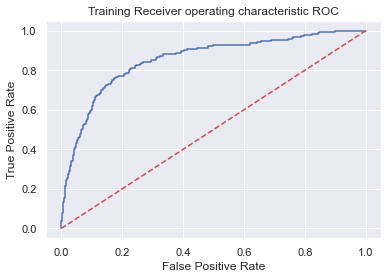

In [42]:
fpr, tpr, thresholds = metrics.roc_curve(ytrain1, logitTrain2.predict(sm.add_constant(xtrain1)))
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Training Receiver operating characteristic ROC')
plt.show()